<font size="6"> Data Analysis with Python and SQL of Traffic Incidents</font>

<font size="2">This project aims to perform a comprehensive analysis of traffic incidents using the programming languages Python and SQL. <p>Data analysis plays a crucial role in understanding and improving road safety, and this project aims to explore the information contained in traffic incident datasets to gain valuable insights.</font>

In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

In [2]:
# excel file path
excel_path = 'TFL Bus Safety.xlsx'

# read pandas
df=pd.read_excel(excel_path)

In [3]:
# SQlite path
db_path = 'BusSafetyPerformance.db'

# connection db
conn = sqlite3.connect(db_path)

In [4]:
# Insira o nome da tabela que deseja criar
#table_name = 'BusSafety'

# Salve o DataFrame no banco de dados SQLite
#df.to_sql(table_name, conn, index=False)

# What is the number of incidents by gender?

In [5]:
# Query SQL
query1 = '''
SELECT `Victims Sex`, COUNT(*) as `Count` 
FROM 'BusSafety' 
WHERE `Victims Sex` like "%male"
GROUP BY `Victims Sex`;
'''
aux1 = pd.read_sql_query(query1, conn)

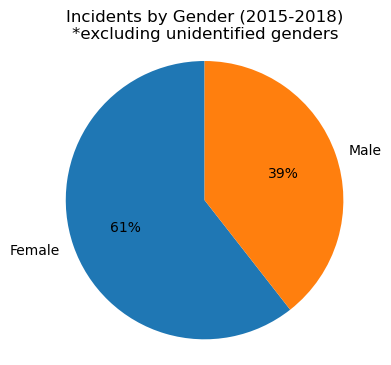

In [6]:
# Plot the graph
plt.figure(figsize=(4, 4))
plt.title('Incidents by Gender (2015-2018)\n*excluding unidentified genders')
plt.pie(aux1['Count'], labels=aux1['Victims Sex'], autopct='%1.0f%%', startangle=90)
plt.axis('equal')
plt.show()

# Which age group is most involved in incidents?

In [7]:
# Query SQL
query2 ='''
SELECT `Victims Age`, COUNT(*) as `Count` 
FROM 'BusSafety' 
GROUP BY `Victims Age`
ORDER BY 'Count' asc;
'''
aux2 = pd.read_sql_query(query2, conn)
aux2 = aux2.sort_values('Count', ascending=False)

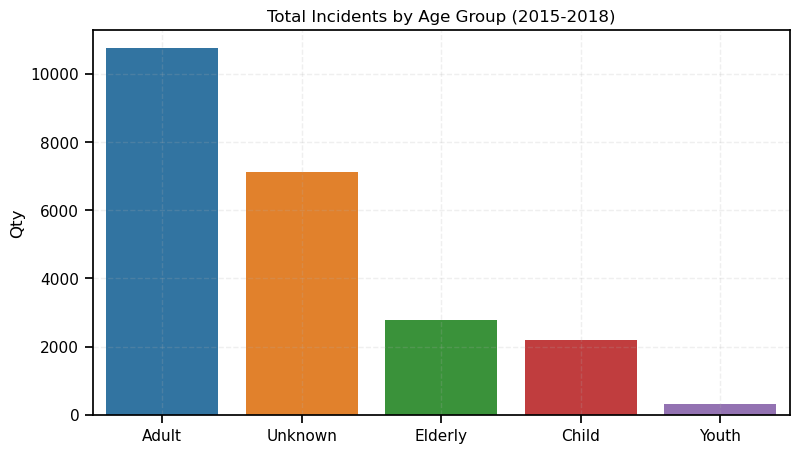

In [8]:
# Plot the graph
sns.set_context("notebook")
plt.figure(figsize=(9, 5))
sns.barplot(x="Victims Age", y = "Count", data = aux2 )
plt.xlabel('')
plt.ylabel('Qty')
plt.title('Total Incidents by Age Group (2015-2018)')
plt.grid(True, linestyle='--', alpha=0.2)
plt.show();

# What is the percentage of incidents by event type?

In [9]:
# Query SQL
query3 = '''
SELECT `Incident Event Type`, COUNT(*) * 100.0 / (SELECT COUNT(*) FROM 'BusSafety') AS `Percent`
FROM 'BusSafety' 
GROUP BY `Incident Event Type`
ORDER BY 'Count' ASC;
'''
aux3 =  pd.read_sql_query(query3, conn)
aux3 = aux3.sort_values("Percent", ascending=False)

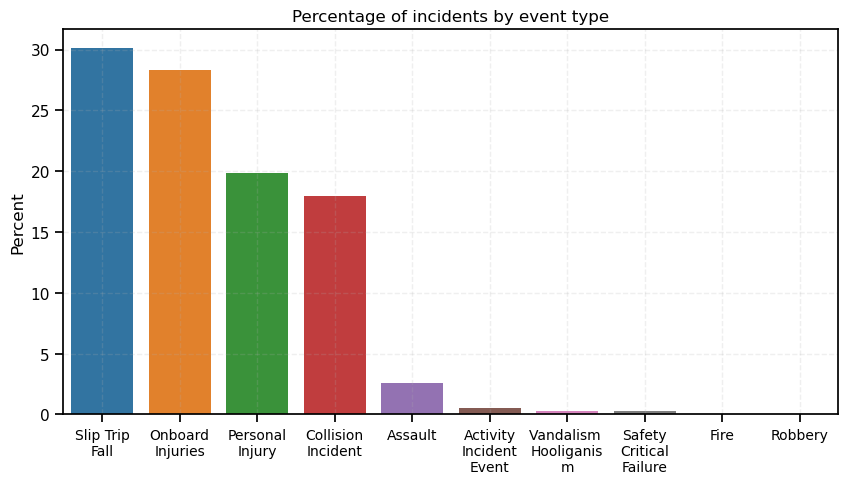

In [10]:
# Plot the graph
sns.set_context("notebook")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Incident Event Type", y="Percent", data=aux3)
plt.xlabel('')
plt.ylabel('Percent')
plt.title('Percentage of incidents by event type')

# textwrap
labels = [textwrap.fill(label.get_text(), 10) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=0, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.2)
plt.show()

# How did incidents per month evolve over time?

In [11]:
# Query SQL
query4 = '''
SELECT strftime('%Y/%m', "Date Of Incident") AS mes,
       COUNT(*) AS total_incidentes 
FROM 'BusSafety'
GROUP BY mes
ORDER BY mes; 
'''
aux4 = pd.read_sql(query4, conn)

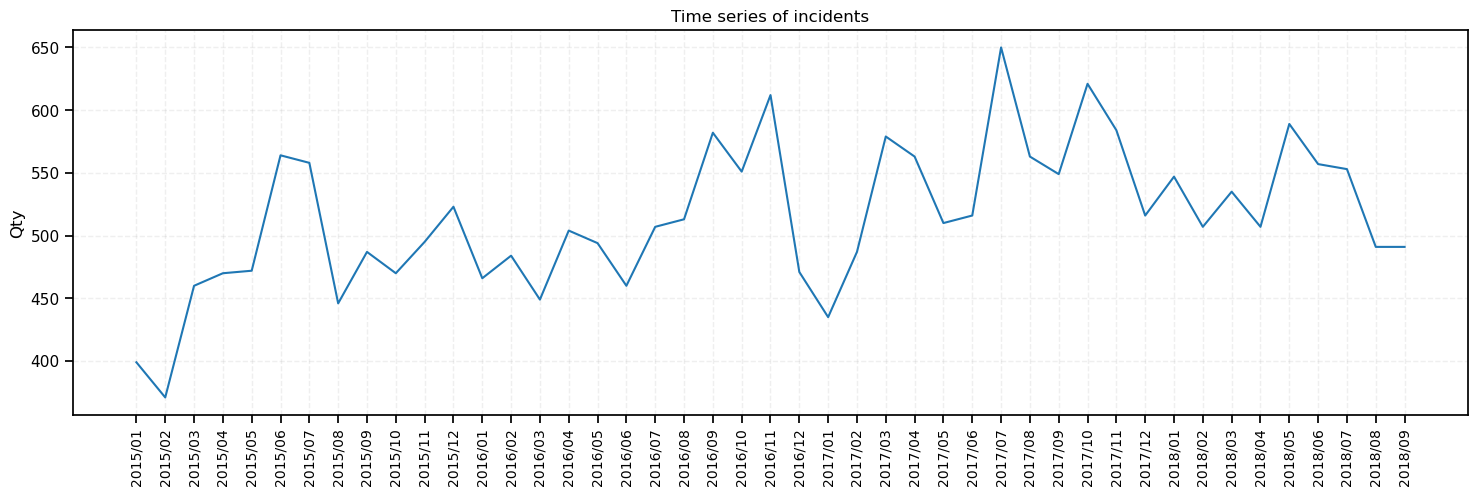

In [12]:
# Plot the graph
plt.figure(figsize=(18, 5))
sns.set_context("notebook")
sns.lineplot(data=aux4, x='mes', y='total_incidentes')
plt.xlabel('')
plt.ylabel('Qty')
plt.title('Time series of incidents')
plt.grid(True, linestyle='--', alpha=0.2)
plt.xticks(rotation=90, fontsize=10)
plt.show()

# When the incident was “Collision Incident” which month had the highest number of incidents involving women?

In [13]:
# Query SQL
query5 = '''
SELECT strftime('%m', "Date Of Incident") AS mes, COUNT(*) AS total_incidentes
FROM 'BusSafety'
WHERE "Incident Event Type" = 'Collision Incident' AND "Victims Sex" = "Female"
GROUP BY mes
ORDER BY mes ASC
'''
aux5 = pd.read_sql_query(query5, conn)

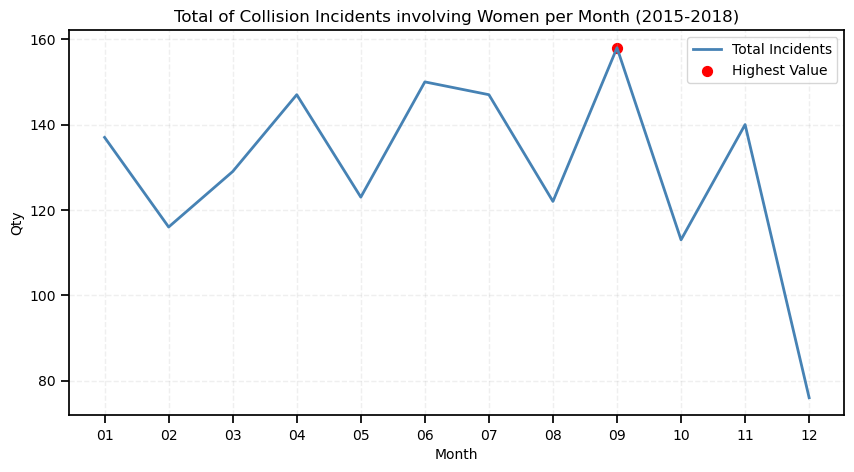

In [14]:
# Plot the graph
plt.figure(figsize=(10, 5))
plt.plot(aux5['mes'], aux5['total_incidentes'], linewidth=2,color = 'steelblue', label='Total Incidents')
plt.xlabel('Month', fontsize=10)
plt.ylabel('Qty', fontsize=10)
plt.title('Total of Collision Incidents involving Women per Month (2015-2018)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# To find the index of the point with the highest value
indice_max = aux5['total_incidentes'].idxmax()

# To mark the point with the highest value on the graph with a red dot
plt.scatter(aux5['mes'][indice_max], aux5['total_incidentes'][indice_max], color='red', s=50, label='Highest Value')

plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.2)
plt.show()

# What was the average number of incidents per month involving children?

In [15]:
# SQL Query 
query6 = '''
SELECT mes, AVG(total_incidentes) AS media_incidentes
FROM (
    SELECT strftime('%m', "Date Of Incident") AS mes, COUNT(*) AS total_incidentes
    FROM BusSafety
    WHERE "Victims Age" = 'Child'
    GROUP BY strftime('%Y-%m', "Date Of Incident")
) AS subquery
GROUP BY mes
ORDER BY mes;
'''
aux6 = pd.read_sql_query(query6, conn)

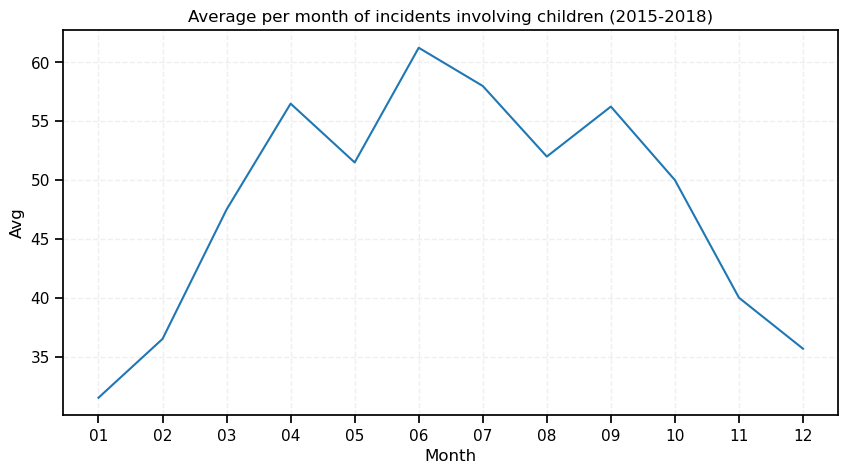

In [16]:
# Plot the graph
plt.figure(figsize=(10, 5))
sns.set_context("notebook")
plt.plot(aux6['mes'], aux6['media_incidentes'])
plt.xlabel('Month')
plt.ylabel('Avg')
plt.title('Average per month of incidents involving children (2015-2018)')
plt.grid(True, linestyle='--', alpha=0.2)
plt.show()

# Considering the incident description as “Injuries treated on scene”, what is the total number of incidents involving males and females?

In [17]:
# SQL Query 
query7 = '''
SELECT "Victims Sex", COUNT(*) AS Total
FROM 'BusSafety'
WHERE "Injury Result Description" = "Injuries treated on scene" AND "Victims Sex" != "Unknown"
GROUP BY "Victims Sex"
'''
aux7 = pd.read_sql(query7, conn)

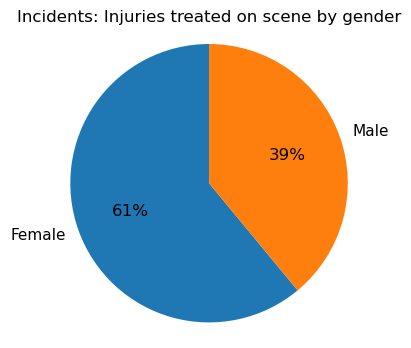

In [18]:
# Plot the graph
sns.set_context("notebook")
plt.figure(figsize=(4, 4))
plt.title('Incidents: Injuries treated on scene by gender')
plt.pie(aux7['Total'], labels=aux7['Victims Sex'], autopct='%1.0f%%', startangle=90)
plt.axis('equal')
plt.show()

# In 2017, in which month were there more incidents with the elderly?

In [19]:
# SQL Query 
query8 = '''
SELECT strftime('%m', "Date Of Incident") AS mes, COUNT(*) AS total_incidentes
FROM 'BusSafety'
WHERE "Year" = 2017 AND "Victims Age" = "Elderly"
GROUP BY mes
ORDER BY mes 
'''
aux8 = pd.read_sql(query8, conn)

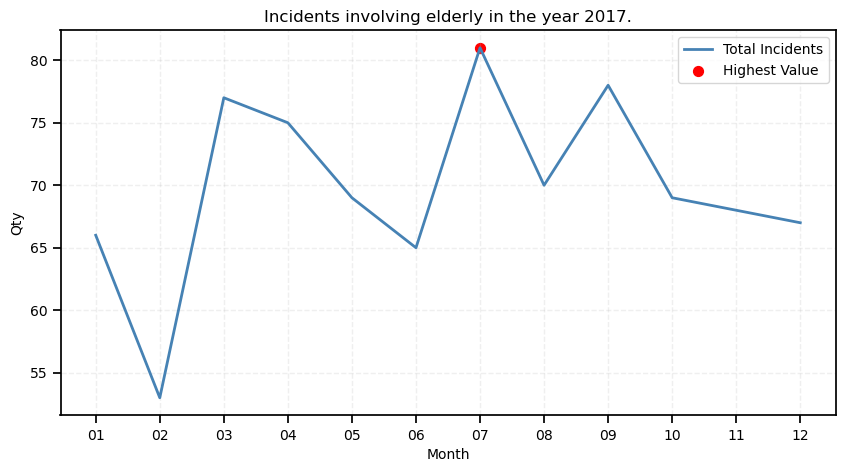

In [20]:
# Plot the graph
sns.set_context("notebook")
plt.figure(figsize=(10, 5))
plt.plot(aux8['mes'], aux8['total_incidentes'], linewidth=2,color = 'steelblue', label='Total Incidents')
plt.xlabel('Month', fontsize=10)
plt.ylabel('Qty', fontsize=10)
plt.title('Incidents involving elderly in the year 2017.', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# To find the index of the point with the highest value
indice_max = aux8['total_incidentes'].idxmax()

# To mark the point with the highest value on the graph with a red dot
plt.scatter(aux8['mes'][indice_max], aux8['total_incidentes'][indice_max], color='red', s=50, label='Highest Value')

plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.2)
plt.show()

# Considering the Operator, what is the distribution of incidents over time?

In [21]:
# SQL Query 
query9 = '''
SELECT strftime('%Y', "Date Of Incident") AS Year, "Group Name", COUNT("Group Name") AS "Total Incident"
FROM BusSafety
GROUP BY Year, Operator
'''
aux9 = pd.read_sql(query9, conn)

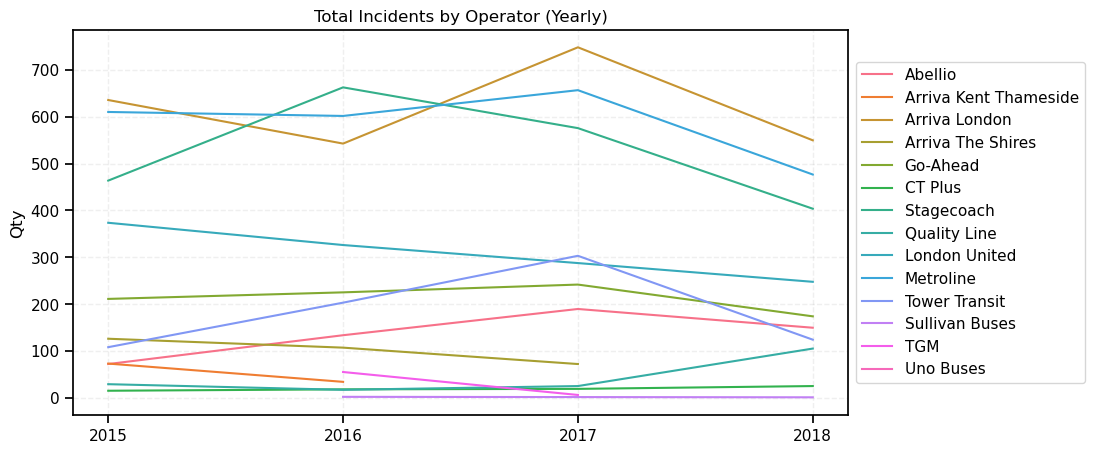

In [22]:
# Plot the graph
plt.figure(figsize=(10, 5))
sns.set_context("notebook")
sns.lineplot(data=aux9, x='Year', y='Total Incident', hue='Group Name', ci=None)
plt.xlabel('')
plt.ylabel('Qty')
plt.title("Total Incidents by Operator (Yearly)")
plt.grid(True, linestyle='--', alpha=0.2)

# To position the legend on the right side of the graph,
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# What is the most common type of incident with cyclists?

In [23]:
# SQL Query 
query10 = '''
SELECT "Incident Event Type" AS "Cyclist Incident", COUNT("Incident Event Type") AS Total
FROM BusSafety
WHERE "Victim Category" LIKE 'Cyclist' OR "Victim Category" LIKE 'Cyclist '
GROUP BY "Incident Event Type"
ORDER BY TOTAL DESC;
'''
aux10= pd.read_sql(query10, conn)

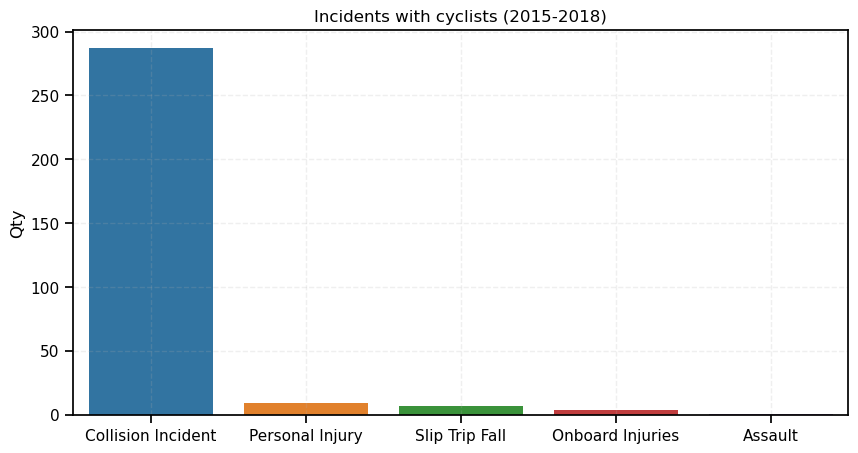

In [24]:
# Plot the graph
plt.figure(figsize=(10, 5))
sns.barplot(x="Cyclist Incident", y = "Total", data = aux10)
plt.xlabel('')
plt.ylabel('Qty')
plt.title('Incidents with cyclists (2015-2018)')
plt.grid(True, linestyle='--', alpha=0.2)
plt.show();

In [25]:
# To close a connection
conn.close()